2層ニューラルネットワークの実装

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
       
        return y
       
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
       
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [12]:
network.params['W1']

array([[ 0.01158878,  0.00959495, -0.01685211, ...,  0.00860352,
         0.00423503,  0.00072313],
       [ 0.00502827, -0.00437781, -0.00352562, ...,  0.01736088,
        -0.01029389, -0.02092657],
       [-0.01927107, -0.01644517, -0.01328256, ...,  0.01772067,
        -0.00133555, -0.00290103],
       ...,
       [-0.01652867,  0.01321429,  0.00337639, ...,  0.00637677,
        -0.00165664, -0.00074023],
       [ 0.01945901, -0.01136442,  0.0010555 , ...,  0.00091109,
        -0.00914113, -0.0088023 ],
       [ 0.01859645, -0.00359945,  0.01141984, ..., -0.00232571,
         0.00307812, -0.00127549]])

In [9]:
network.params['W1'].shape

(784, 50)

In [10]:
network.params['b1'].shape

(50,)

MNISTデータセットを使って学習

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.78095, 0.7863
train acc, test acc | 0.8755166666666667, 0.881
train acc, test acc | 0.8986, 0.8993
train acc, test acc | 0.9086333333333333, 0.9116
train acc, test acc | 0.91585, 0.9183
train acc, test acc | 0.92135, 0.9237
train acc, test acc | 0.9250833333333334, 0.9257
train acc, test acc | 0.9287833333333333, 0.9315
train acc, test acc | 0.9331833333333334, 0.933
train acc, test acc | 0.9350833333333334, 0.9353
train acc, test acc | 0.9377, 0.9387
train acc, test acc | 0.9407666666666666, 0.9413
train acc, test acc | 0.9426333333333333, 0.9435
train acc, test acc | 0.9440333333333333, 0.9448
train acc, test acc | 0.94575, 0.9454
train acc, test acc | 0.9479, 0.947


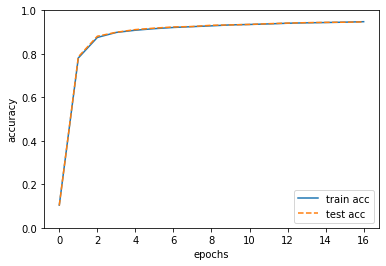

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データとテストデータの認識精度の差が少ないため、過学習が起きていないことがわかる。

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.82095, 0.8272
train acc, test acc | 0.8839166666666667, 0.8875
train acc, test acc | 0.8990666666666667, 0.9021
train acc, test acc | 0.9064833333333333, 0.9096
train acc, test acc | 0.9138333333333334, 0.9163
train acc, test acc | 0.9185666666666666, 0.9199
train acc, test acc | 0.9214833333333333, 0.9248
train acc, test acc | 0.9245, 0.9263
train acc, test acc | 0.9287666666666666, 0.9294
train acc, test acc | 0.9316666666666666, 0.934
train acc, test acc | 0.9340166666666667, 0.936
train acc, test acc | 0.9377833333333333, 0.9367
train acc, test acc | 0.93905, 0.9392
train acc, test acc | 0.9418, 0.941
train acc, test acc | 0.94435, 0.9438
train acc, test acc | 0.9461, 0.9456


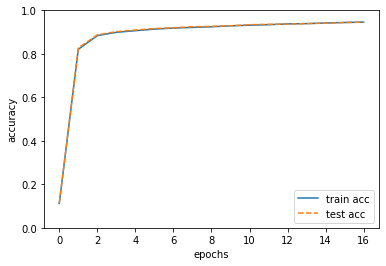

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

隠し層を倍にしても訓練データもテストデータも精度が向上していないことがわかる。

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.8730666666666667, 0.8779
train acc, test acc | 0.9067333333333333, 0.9111
train acc, test acc | 0.9189333333333334, 0.9231
train acc, test acc | 0.9268166666666666, 0.9289
train acc, test acc | 0.9330666666666667, 0.9328
train acc, test acc | 0.9391166666666667, 0.9404
train acc, test acc | 0.9438333333333333, 0.9436
train acc, test acc | 0.9471, 0.9435
train acc, test acc | 0.9509, 0.947
train acc, test acc | 0.9534666666666667, 0.9503
train acc, test acc | 0.9554833333333334, 0.9529
train acc, test acc | 0.95875, 0.955
train acc, test acc | 0.9606, 0.9553
train acc, test acc | 0.9616833333333333, 0.9566
train acc, test acc | 0.9639, 0.9582
train acc, test acc | 0.9655833333333333, 0.9596


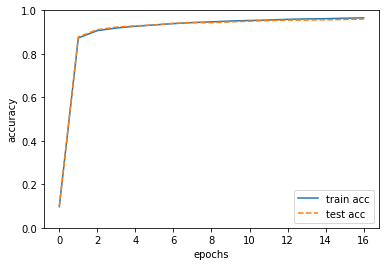

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.2

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

学習率を２倍にするとむしろ精度がわずかによくなった。しかし、訓練データとテストデータの差が大きくなっているため、過学習気味になっていると考えられる。

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.5052666666666666, 0.5047
train acc, test acc | 0.7737833333333334, 0.7797
train acc, test acc | 0.8392333333333334, 0.8446
train acc, test acc | 0.8689333333333333, 0.8729
train acc, test acc | 0.8868, 0.8898
train acc, test acc | 0.8975166666666666, 0.8991
train acc, test acc | 0.90385, 0.9064
train acc, test acc | 0.9069833333333334, 0.9101
train acc, test acc | 0.91045, 0.9125
train acc, test acc | 0.9139833333333334, 0.9157
train acc, test acc | 0.9170833333333334, 0.9186
train acc, test acc | 0.9192166666666667, 0.9203
train acc, test acc | 0.9211, 0.9221
train acc, test acc | 0.9235666666666666, 0.9245
train acc, test acc | 0.9252, 0.9252
train acc, test acc | 0.9272833333333333, 0.9275
train acc, test acc | 0.9291666666666667, 0.9302
train acc, test acc | 0.93045, 0.9309
train acc, test acc | 0.9319333333333333, 0.932
train acc, test acc | 0.9334333333333333, 0.9332
train acc, test acc | 0.9347833333333333

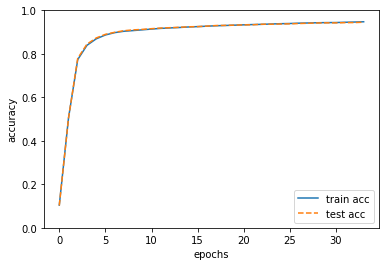

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

バッチサイズを倍にすると修正を行うタイミングが二倍になるため実行時間が長くなるが、精度に向上は見られない

感想　

実際に学習を行い評価ができたため、ニューラルネットワークについてさらに理解できた。勾配法や損失関数などの用語についても理解できた。難しくなってきたが、次回以降も理解できるように復習したい。

参考文献

ゼロから始めるDeepLeanring　第４章ニューラルネットワークの学習